<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [78]:
# Solution

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    res_sum = np.zeros_like(V[0])

    for matrix in X:
        for vector in V:
            res_sum += np.dot(matrix, vector)
    return res_sum

# Tests

def first_test():
    matrix1 = np.array([[1, 2], [3, 4]])
    matrix2 = np.array([[5, 6], [7, 8]])
    vector1 = np.array([1, 2])
    vector2 = np.array([3, 4])
    X = [matrix1, matrix2]
    V = [vector1, vector2]

    expected = np.dot(matrix1, vector1) + np.dot(matrix2, vector2) + np.dot(matrix1, vector2) + np.dot(matrix2, vector1)

    np.testing.assert_array_equal(sum_prod(X, V), expected)

# Testing

first_test()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [82]:
# Solution

def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

# Tests

def first_test():
    M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    threshold = 3
    result = binarize(M, threshold)

    expected = np.array([[0, 0, 0], [1, 1, 1], [1, 1, 1]])
            
    np.testing.assert_array_equal(result, expected)

def second_test():
    M = np.array([[7, 7, 7], [4, 5, 8], [2, 1, 3]])
    threshold = 4
    result = binarize(M, threshold)

    expected = np.array([[1, 1, 1], [0, 1, 1], [0, 0, 0]])
            
    np.testing.assert_array_equal(result, expected)

def third_test():
    M = np.array([[8, 9, 3], [7, 4, 8], [1, 5, 7]])
    threshold = 3.5
    result = binarize(M, threshold)

    expected = np.array([[1, 1, 0], [1, 1, 1], [0, 1, 1]])
            
    np.testing.assert_array_equal(result, expected)

# Testing

first_test()
second_test()
third_test()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [158]:
# Solution

def unique_rows(mat):
    unique_rows = []

    for row in mat:
        unique_rows.append(sorted(list(set(row))))

    return unique_rows

def unique_columns(mat):
    unique_columns = []

    for i in range(len(mat[0])):
        column = []
        for row in mat:
            column.append(row[i])
        unique_columns.append(sorted(list(set(column))))

    return unique_columns

# Tests

def first_test():
    mat = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    result_rows = unique_rows(mat)
    result_columns = unique_columns(mat)

    expected_rows = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    expected_columns =  [[1, 4, 7], [2, 5, 8], [3, 6, 9]]

    np.testing.assert_array_equal(result_rows, expected_rows)
    np.testing.assert_array_equal(result_columns, expected_columns)

def second_test():
    mat = [[1, 1, 2], [4, 4, 7], [7, 3, 3]]
    result_rows = unique_rows(mat)
    result_columns = unique_columns(mat)

    expected_rows = [[1, 2], [4, 7], [3, 7]]
    expected_columns =  [[1, 4, 7], [1, 3, 4], [2, 3, 7]]

    np.testing.assert_array_equal(result_rows, expected_rows)
    np.testing.assert_array_equal(result_columns, expected_columns)

# Testing

first_test()
second_test()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

(array([0.78063582, 0.45320763, 1.07541987]),
 array([0.29200597, 0.25386763, 0.84744037]),
 array([0.10591351, 1.06397339, 1.13937643]),
 array([0.1594753 , 0.67842513, 0.0852952 ]))

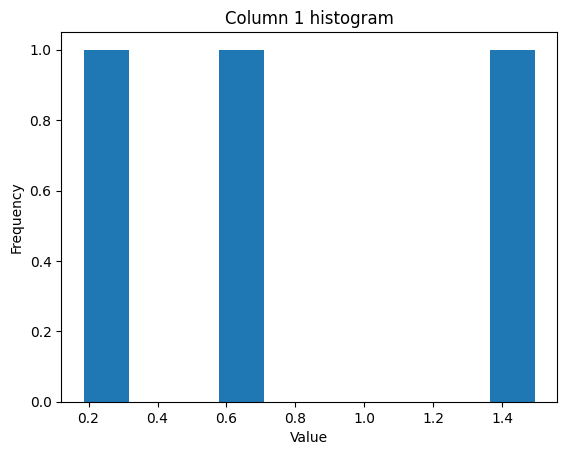

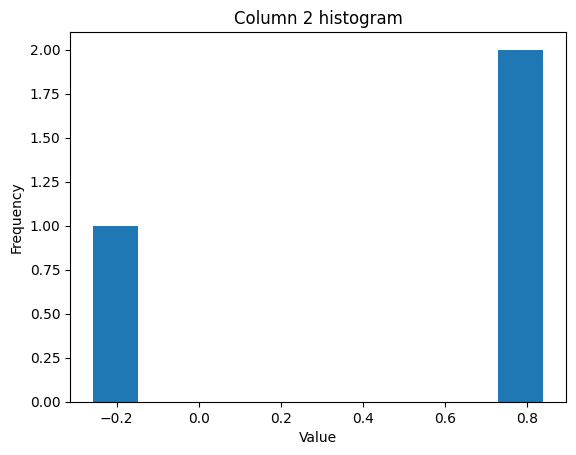

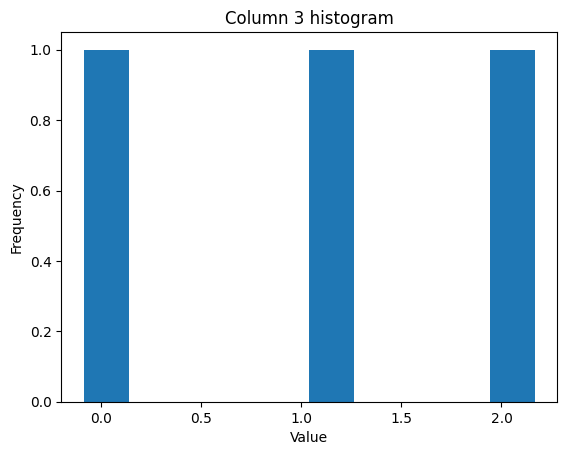

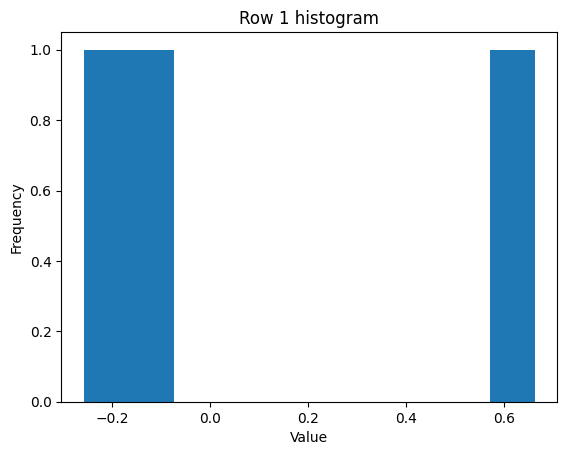

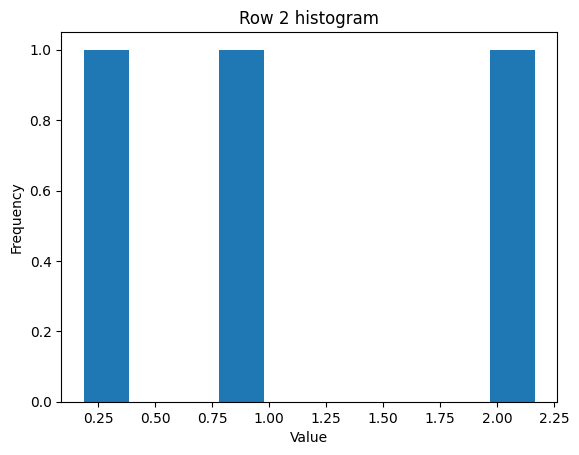

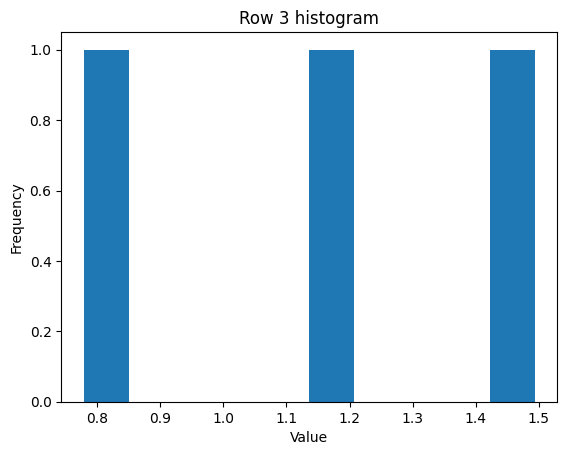

In [171]:
# Solution

def get_random_matrix(m, n):
    matrix = np.random.randn(m, n)
    
    columns_means = np.mean(matrix, axis=0)
    rows_means = np.mean(matrix, axis=1)
    
    columns_vars = np.var(matrix, axis=0)
    rows_vars = np.var(matrix, axis=1)

    for i in range(n):
        plt.figure()
        plt.hist(matrix[:,i])
        plt.title(f'Column {i+1} histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i,:])
        plt.title(f'Row {i+1} histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    
    return columns_means, columns_vars, rows_means, rows_vars

get_random_matrix(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [193]:
# Solution

def chess(m, n, a, b):
    matrix = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b

    return matrix

# Tests

def first_test():
    m = n = a = 3
    b = 4
    result = chess(m, n, a, b)

    expected = [[3, 4, 3], [4, 3, 4], [3, 4, 3]]

    np.testing.assert_array_equal(result, expected)

def second_test():
    m = n = 4
    a = 7
    b = 9
    result = chess(m, n, a, b)

    expected = [[7, 9, 7, 9], [9, 7, 9, 7], [7, 9, 7, 9], [9, 7, 9, 7]]

    np.testing.assert_array_equal(result, expected)

def third_test():
    m = n = 2
    a = 0
    b = 1
    result = chess(m, n, a, b)

    expected = [[0, 1], [1, 0]]

    np.testing.assert_array_equal(result, expected)

# Testing

first_test()
second_test()
third_test()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [206]:
from PIL import Image, ImageDraw

# Solution

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = get_image(m, n, background_color)
    draw = get_draw(image)

    draw.rectangle([(0, 0), (a, b)], fill=rectangle_color)

    image.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = get_image(m, n, background_color)
    draw = get_draw(image)

    draw.ellipse([(0, 0), (2 * a, 2 * b)], fill=ellipse_color)

    image.show()

def get_image(m, n, background_color):
    image = Image.new('RGB', (m, n), background_color)
    return image

def get_draw(image):
    draw = ImageDraw.Draw(image)
    return draw

# Tests

def first_test():
    a = 150
    b = 100
    m = 300
    n = 400
    rectangle_color = (0, 90, 0)
    background_color = (255, 255, 0)

    draw_rectangle(a, b, m, n, rectangle_color, background_color)

def second_test():
    a = 200
    b = 150
    m = 500
    n = 400
    rectangle_color = (0, 120, 0)
    background_color = (75, 0, 130)

    draw_ellipse(a, b, m, n, rectangle_color, background_color)

# Testing

first_test()
second_test()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [271]:
#from scipy.signal import argrelextrema
import pandas as pd
import scipy as sc

# Solution

def get_mathematical_expectation(row):
    return np.mean(row) 

def get_dispersion(row):
    return np.var(row)

def get_standard_deviation(row):
    return np.std(row)

def get_local_max(row):
    return sc.argrelextrema(row, np.greater)

def get_local_min(row):
    return sc.argrelextrema(row, np.less)

def get_moving_average(row, p):
    return pd.Series(row).rolling(window=p).mean().tolist()


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [259]:
# Solution

def one_hot_encoding(vector):
    max_met = max(vector)
    len_vector = len(vector)
    hot_encoding = [ [0] * (max_met + 1) for i in range(len_vector)]  #[0 * (max_met + 1)][len_vector]

    for i in range(len_vector):
        hot_encoding[i][vector[i]] = 1

    return hot_encoding

one_hot_encoding([0, 2, 3, 0])

[[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]